## Assignment 4

This assignment is based on content discussed in module 8 and using Decision Trees and Ensemble Models in classification and regression problems.

## Learning outcomes 

- Understand how to use decision trees on a Dataset to make a prediction
- Learning hyper-parameters tuning for decision trees by using RandomGrid 
- Learning the effectiveness of ensemble algorithms (Random Forest, Adaboost, Extra trees classifier, Gradient Boosted Tree)

In the first part of this assignment, you will use Classification Trees for predicting if a user has a default payment option active or not. You can find the necessary data for performing this assignment [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 

This dataset is aimed at the case of customer default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default.

Required imports for this project are given below. Make sure you have all libraries required for this project installed. You may use conda or pip based on your set up.

__NOTE:__ Since data is in Excel format you need to install `xlrd` in order to read the excel file inside your pandas dataframe. You can run `pip install xlrd` to install 

In [1]:
#required imports
import numpy as np
import pandas as pd

After installing the necessary libraries, proceed to download the data. Since reading the excel file won't create headers by default, we added two more operations to substitute the columns.

In [2]:
#loading the data
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls")
dataset.columns = dataset.iloc[0]
dataset.drop(['ID'], axis=1, inplace=True)
dataset = dataset[1:]

In the following, you can take a look into the dataset.

In [3]:
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


## Questions (15 points total)

#### Question 1 (2 pts)
Build a classifier by using decision tree and calculate the confusion matrix. Try different hyper-parameters (at least two) and discuss the result.

In [4]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
#Rename the default column to make our lives easier
dataset.rename(columns={"default payment next month":"Default"}, inplace = True)
dataset.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Creating the target variable 
y = dataset['Default'].copy()
y = y.astype('int')

#Create the features
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X = dataset[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object', name=0)

In [7]:
#Split into training and testing datasets, doing a 75/25 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [8]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 10)

In [9]:
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

Test Accuracy:  81.15 %


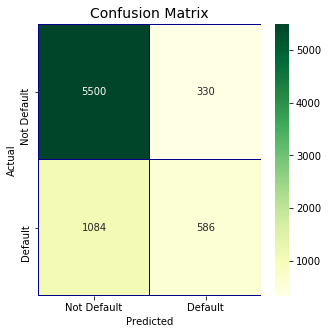

In [10]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="YlGn", fmt="d")
plt.title('Confusion Matrix', fontsize=14)
print("Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")
plt.show()

Roughly 81% accuracy for our decision tree classifier with a max depth of 10 

Try changing the max depth up to see if we get a better result 

In [11]:
#Split into training and testing datasets, doing a 75/25 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [12]:
tree = DecisionTreeClassifier(max_depth = 5, random_state = 10)

In [13]:
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

Test Accuracy:  82.04 %


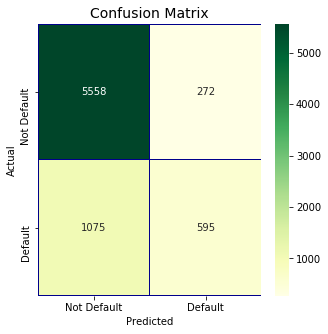

In [14]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="YlGn", fmt="d")
plt.title('Confusion Matrix', fontsize=14)
print("Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")
plt.show()

When we halve the max depth of tree we get a slightly better result 82.04% vs. 81.15% (depth 10)

#### Question 2 (4 pts)

Try to build the decision tree which you built for the previous question, but this time by RandomizedSearchCV over hyper-parameters. Compare the results.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}

# create the grid
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8205333333333333


In [16]:
#Split into training and testing datasets, doing a 75/25 train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [17]:
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

Test Accuracy:  82.09 %


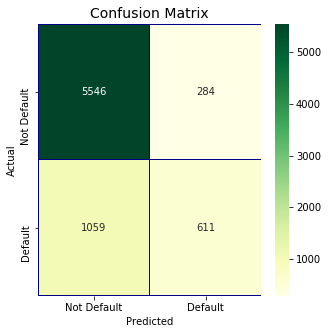

In [19]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="YlGn", fmt="d")
plt.title('Confusion Matrix', fontsize=14)
print("Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")
plt.show()

The model produced with the RandomizedSearchCV had an accuracy of 82.09% vs. 82.04% of the best producing model from Question 1. 

#### Question 3 (6 pts)

Try to build the same classifier by using following ensemble models. For each of these models calculate accuracy and at least for two in the list below, plot the learning curves.

* Random Forest 
* AdaBoost
* Extra Trees Classifier 
* Gradient Boosted Trees 


In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()

#RandomForestClassifier 
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print("Random Forest Classifier Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")

#GradientBoostingClassifier
gbc.fit(X_train, y_train)
predictions = gbc.predict(X_test)
print("Gradient Boosting Classifier Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")

#AdaBoostClassifier
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)
print("Ada Boost Classifier Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")

#ExtraTreesClassifier
etc.fit(X_train, y_train)
predictions = etc.predict(X_test)
print("Extra Trees Classifier Test Accuracy: ",round(accuracy_score(y_true = y_test, y_pred = predictions)*100,2),"%")

/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Test Accuracy:  80.56 %
Gradient Boosting Classifier Test Accuracy:  82.12 %
Ada Boost Classifier Test Accuracy:  81.8 %


/Users/Andrew/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Extra Trees Classifier Test Accuracy:  80.15 %


#### Question 4 (3 pts)

Discuss and compare the results for the all past three questions. 

* How does changing hyperparms effect model performance? 
* Why do you think certain models performed better/worse? 
* How does this performance line up with known strengths/weakness of these models?

Performance lines up with what is expected / strengths and weakness of the models

Changing hyperparms effects model performance by allowing you to tune it so that you can maximize accuracy